In [2]:
#importing libraries
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Connect to MySQL Database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Siuuuuuu@7",  # change this
    database="bikes"
)

In [4]:
# Query Data
query = "SELECT * FROM bike_sales;"
df = pd.read_sql(query, conn)

C:\Users\kamaleshv\AppData\Local\Temp\ipykernel_10468\2215867509.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [5]:
# Close connection
conn.close()

In [7]:
df

,Date,Brand,Model,Engine_CC,Mileage,Price,Quantity_Sold,Region,Dealer_Name,Customer_Age_Group
0,2023-04-17,TVS,Ntorq,400,50.0,202299,2,West,Dealer_11,36-45
1,2023-03-13,Royal Enfield,Meteor 350,500,43.6,273276,5,Central,Dealer_8,56+
2,2024-04-11,TVS,Raider,350,33.9,275328,1,South,Dealer_4,56+
3,2023-08-03,Yamaha,MT-15,110,48.2,219596,8,North,Dealer_1,56+
4,2024-10-23,Yamaha,MT-15,500,60.8,111289,4,West,Dealer_7,26-35
...,...,...,...,...,...,...,...,...,...,...
995,2024-04-25,Suzuki,Burgman,110,36.1,155759,5,Central,Dealer_9,26-35
996,2024-04-20,Suzuki,Access 125,350,44.2,107247,6,East,Dealer_20,46-55
997,2023-10-30,Bajaj,Pulsar 150,200,43.8,117811,8,North,Dealer_11,56+
998,2023-09-17,Yamaha,R15,500,34.8,146730,8,East,Dealer_14,26-35


In [8]:
# Display first few rows
df.head()

,Date,Brand,Model,Engine_CC,Mileage,Price,Quantity_Sold,Region,Dealer_Name,Customer_Age_Group
0,2023-04-17,TVS,Ntorq,400,50.0,202299,2,West,Dealer_11,36-45
1,2023-03-13,Royal Enfield,Meteor 350,500,43.6,273276,5,Central,Dealer_8,56+
2,2024-04-11,TVS,Raider,350,33.9,275328,1,South,Dealer_4,56+
3,2023-08-03,Yamaha,MT-15,110,48.2,219596,8,North,Dealer_1,56+
4,2024-10-23,Yamaha,MT-15,500,60.8,111289,4,West,Dealer_7,26-35


In [ ]:
# Basic structure

In [9]:
df.shape

(1000, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1000 non-null   object 
 1   Brand               1000 non-null   object 
 2   Model               1000 non-null   object 
 3   Engine_CC           1000 non-null   int64  
 4   Mileage             1000 non-null   float64
 5   Price               1000 non-null   int64  
 6   Quantity_Sold       1000 non-null   int64  
 7   Region              1000 non-null   object 
 8   Dealer_Name         1000 non-null   object 
 9   Customer_Age_Group  1000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 78.3+ KB


In [11]:
df.describe()

,Engine_CC,Mileage,Price,Quantity_Sold
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,264.825000,45.851400,181921.05600,5.342000
std,136.012293,10.097514,66602.59611,2.882594
min,110.000000,17.200000,70065.00000,1.000000
25%,143.750000,39.175000,124370.50000,3.000000
50%,250.000000,45.800000,178479.50000,5.000000
75%,400.000000,52.700000,240678.00000,8.000000
max,500.000000,78.700000,299998.00000,10.000000


In [12]:
# Check for missing or duplicate values
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


Missing values:
 Date                  0
Brand                 0
Model                 0
Engine_CC             0
Mileage               0
Price                 0
Quantity_Sold         0
Region                0
Dealer_Name           0
Customer_Age_Group    0
dtype: int64

Duplicates: 0


In [13]:
# Quick view of unique brands and regions
print("\nBrands:", df['Brand'].unique())
print("\nRegions:", df['Region'].unique())


Brands: ['TVS' 'Royal Enfield' 'Yamaha' 'Jawa' 'Bajaj' 'Suzuki' 'Hero' 'Honda']

Regions: ['West' 'Central' 'South' 'North' 'East']


In [14]:
# Convert Date from object → datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

In [16]:
# Fill missing values if needed
df.fillna(method='ffill', inplace=True)

C:\Users\kamaleshv\AppData\Local\Temp\ipykernel_14308\3119942158.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [17]:
# Create date components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.strftime('%B')
df['Day'] = df['Date'].dt.day_name()

In [18]:
# Confirm transformations
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1000 non-null   datetime64[ns]
 1   Brand               1000 non-null   object        
 2   Model               1000 non-null   object        
 3   Engine_CC           1000 non-null   int64         
 4   Mileage             1000 non-null   float64       
 5   Price               1000 non-null   int64         
 6   Quantity_Sold       1000 non-null   int64         
 7   Region              1000 non-null   object        
 8   Dealer_Name         1000 non-null   object        
 9   Customer_Age_Group  1000 non-null   object        
 10  Year                1000 non-null   int32         
 11  Month               1000 non-null   int32         
 12  Month_Name          1000 non-null   object        
 13  Day                 1000 non-null   object       

,Date,Brand,Model,Engine_CC,Mileage,Price,Quantity_Sold,Region,Dealer_Name,Customer_Age_Group,Year,Month,Month_Name,Day
0,2023-04-17,TVS,Ntorq,400,50.0,202299,2,West,Dealer_11,36-45,2023,4,April,Monday
1,2023-03-13,Royal Enfield,Meteor 350,500,43.6,273276,5,Central,Dealer_8,56+,2023,3,March,Monday
2,2024-04-11,TVS,Raider,350,33.9,275328,1,South,Dealer_4,56+,2024,4,April,Thursday
3,2023-08-03,Yamaha,MT-15,110,48.2,219596,8,North,Dealer_1,56+,2023,8,August,Thursday
4,2024-10-23,Yamaha,MT-15,500,60.8,111289,4,West,Dealer_7,26-35,2024,10,October,Wednesday


In [ ]:
#Exploratory Data Analysis (aggregations & quick insights)

In [20]:
# Summary KPIs
total_units = df['Quantity_Sold'].sum()
avg_price = df['Price'].mean()

print(f"Total Units Sold: {total_units}")
print(f"Average Price: ₹{avg_price:,.0f}")

Total Units Sold: 5342
Average Price: ₹181,921


In [23]:
# Aggregations
sales_by_brand = df.groupby('Brand')['Quantity_Sold'].sum().sort_values(ascending=False)
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
sales_by_region = df.groupby('Region')['Quantity_Sold'].sum().sort_values(ascending=False)
monthly_sales = df.groupby(['Year','Month'])['Quantity_Sold'].sum().reset_index().sort_values(['Year','Month'])

In [25]:
#display top results
display(sales_by_brand.head(10))

Brand
Bajaj            874
Hero             677
TVS              670
Honda            657
Suzuki           651
Royal Enfield    621
Yamaha           616
Jawa             576
Name: Quantity_Sold, dtype: int64

In [26]:
display(sales_by_region)

Region
South      1184
East       1125
West       1115
North      1061
Central     857
Name: Quantity_Sold, dtype: int64

In [27]:
display(monthly_sales.head())

,Year,Month,Quantity_Sold
0,2023,1,262
1,2023,2,198
2,2023,3,249
3,2023,4,270
4,2023,5,287


In [28]:
# Set common plot size
plt.rcParams['figure.figsize'] = (10,5)

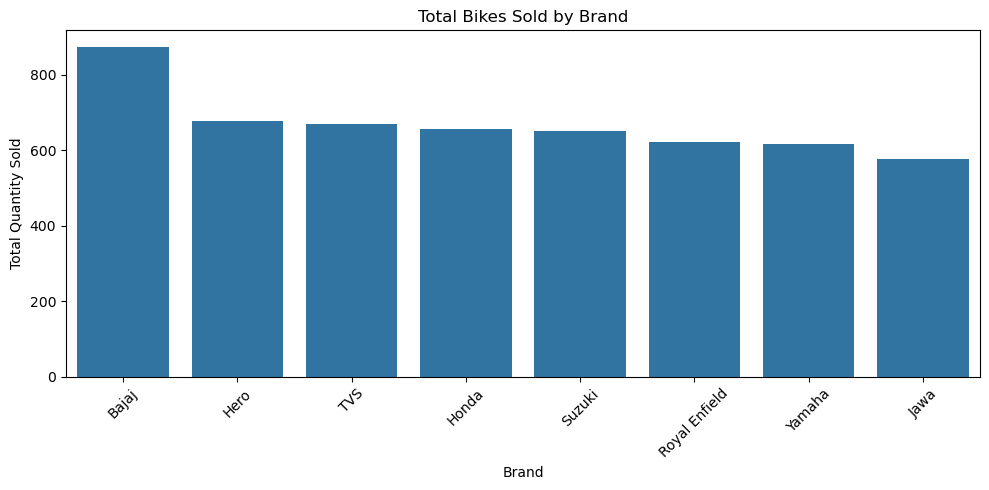

In [29]:
#1) Total bikes sold by brand (bar)
plt.figure()
sns.barplot(x=sales_by_brand.index, y=sales_by_brand.values)
plt.title("Total Bikes Sold by Brand")
plt.xlabel("Brand"); plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

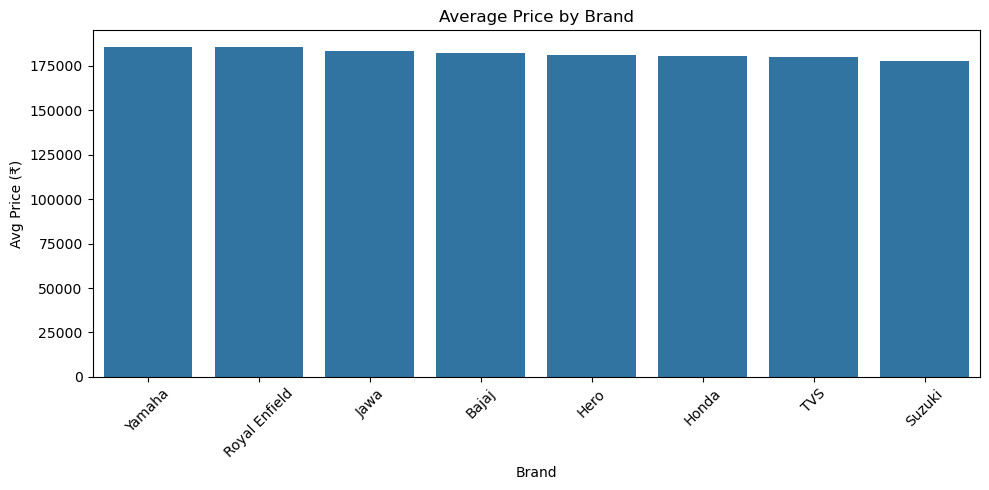

In [31]:
#2) Average Price by Brand
plt.figure()
sns.barplot(x=avg_price_by_brand.index, y=avg_price_by_brand.values)
plt.title("Average Price by Brand")
plt.xticks(rotation=45)
plt.ylabel("Avg Price (₹)")
plt.tight_layout()
plt.show()

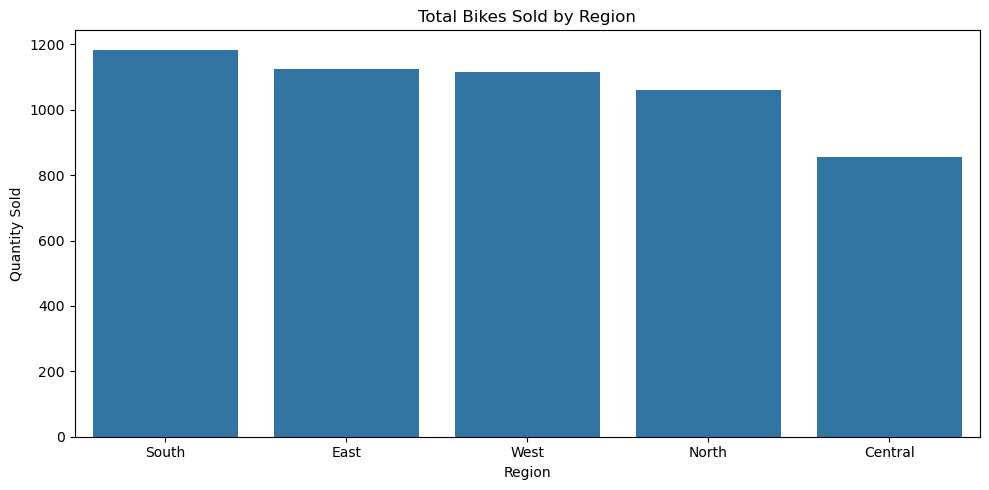

In [32]:
#3) Sales by region (bar)
plt.figure()
sns.barplot(x=sales_by_region.index, y=sales_by_region.values)
plt.title("Total Bikes Sold by Region")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

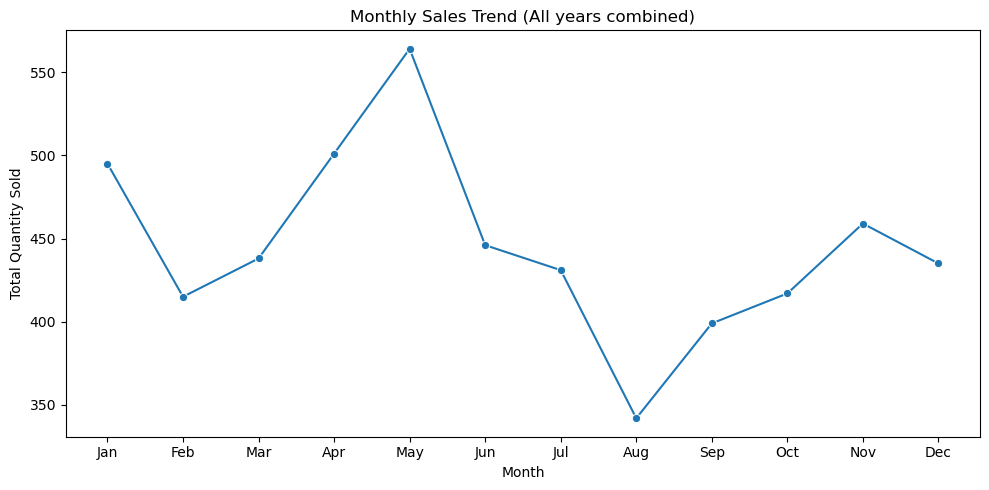

In [33]:
#4) Monthly sales trend (line) — aggregated by month across years (ordered months)
# aggregate by Month number to order months
monthly = df.groupby('Month')['Quantity_Sold'].sum().reindex(range(1,13), fill_value=0)
plt.figure()
sns.lineplot(x=monthly.index, y=monthly.values, marker='o')
plt.title("Monthly Sales Trend (All years combined)")
plt.xlabel("Month")
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.show()


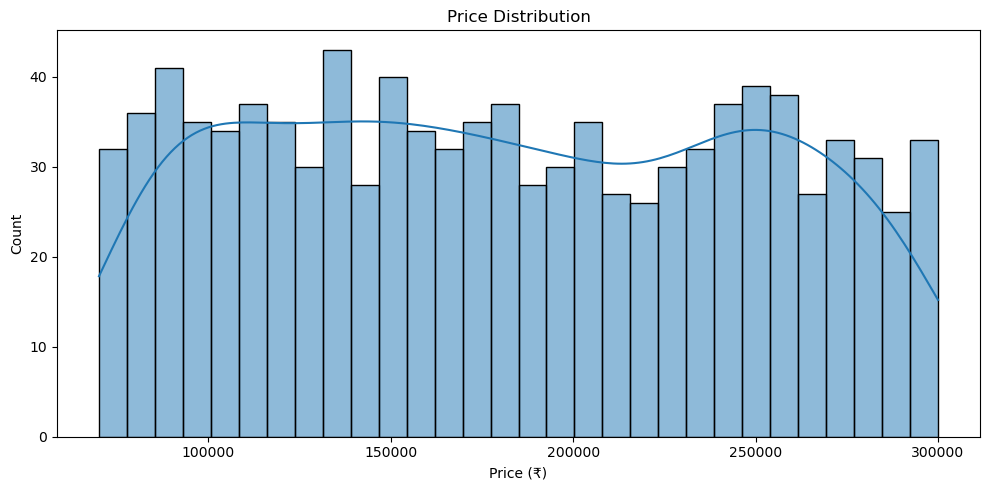

In [34]:
#5) Price distribution (histogram)
plt.figure()
sns.histplot(df['Price'], kde=True, bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (₹)")
plt.tight_layout()
plt.show()

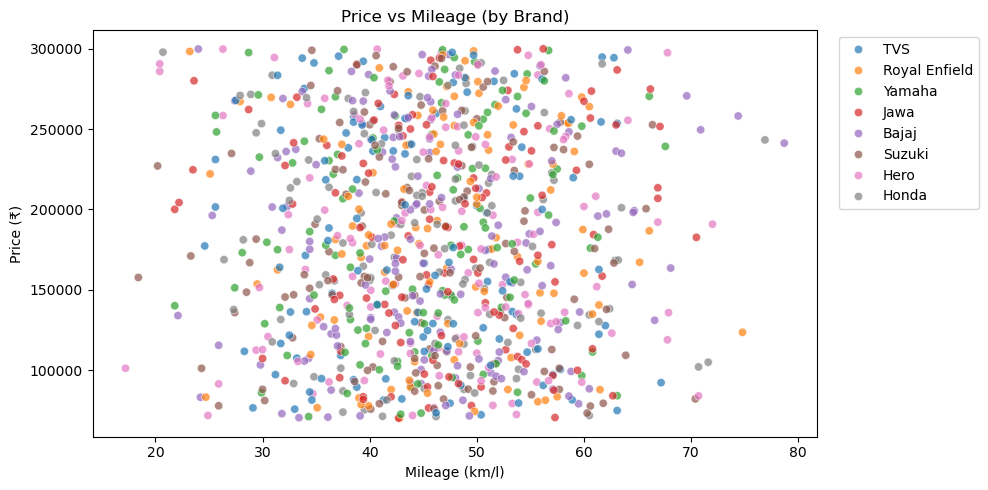

In [35]:
#6) Price vs Mileage (scatter)
plt.figure()
sns.scatterplot(data=df, x='Mileage', y='Price', hue='Brand', alpha=0.7)
plt.title("Price vs Mileage (by Brand)")
plt.xlabel("Mileage (km/l)")
plt.ylabel("Price (₹)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

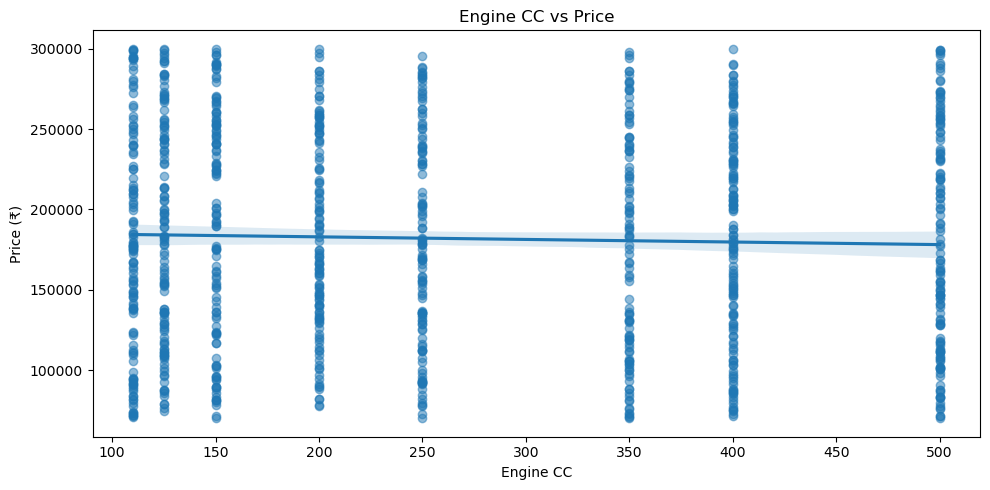

In [36]:
#7) Engine_CC vs Price (regression)
plt.figure()
sns.regplot(data=df, x='Engine_CC', y='Price', scatter_kws={'alpha':0.5})
plt.title("Engine CC vs Price")
plt.xlabel("Engine CC"); plt.ylabel("Price (₹)")
plt.tight_layout()
plt.show()

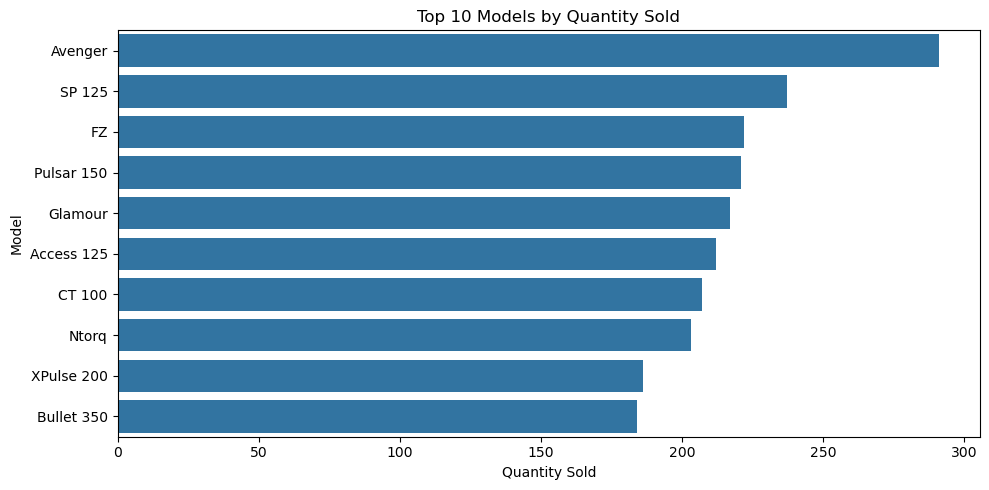

In [37]:
#8) Top 10 models by quantity sold (horizontal bar)
top_models = df.groupby('Model')['Quantity_Sold'].sum().sort_values(ascending=False).head(10)
plt.figure()
sns.barplot(x=top_models.values, y=top_models.index)
plt.title("Top 10 Models by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.tight_layout()
plt.show()

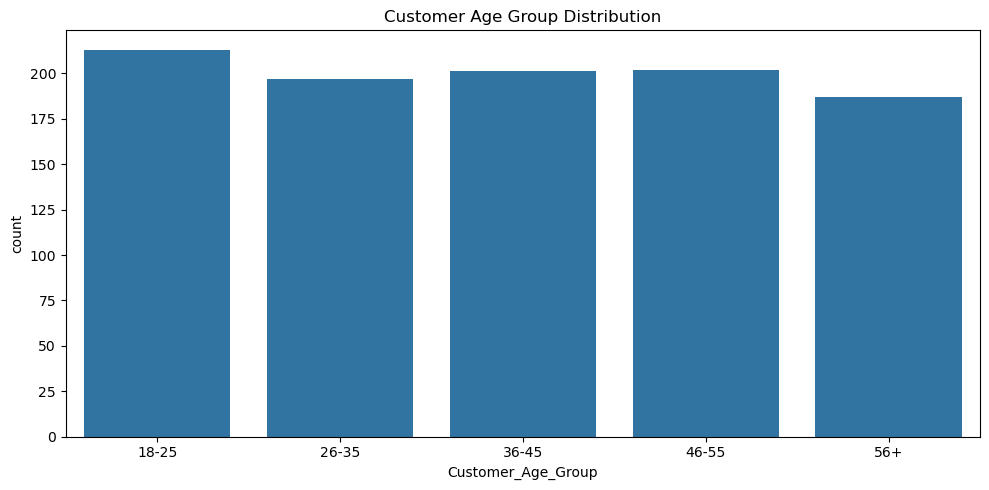

In [38]:
#9) Customer age group distribution (countplot)
plt.figure()
order = ['18-25','26-35','36-45','46-55','56+']
sns.countplot(x='Customer_Age_Group', data=df, order=order)
plt.title("Customer Age Group Distribution")
plt.tight_layout()
plt.show()

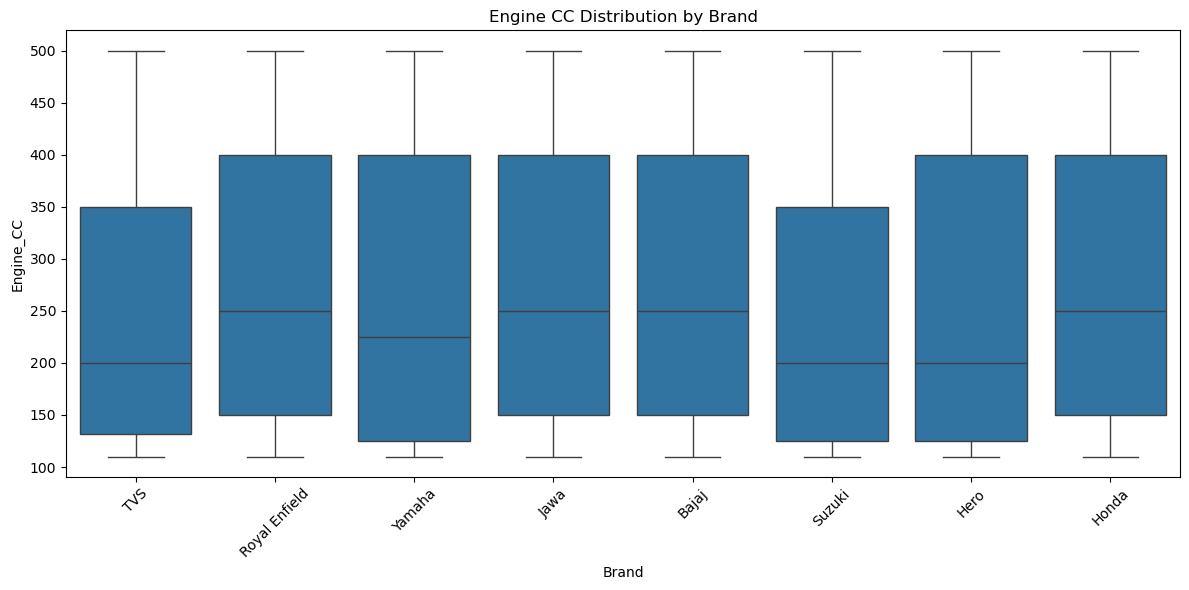

In [39]:
#10) Engine_CC distribution (boxplot by brand)
plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Engine_CC', data=df)
plt.title("Engine CC Distribution by Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

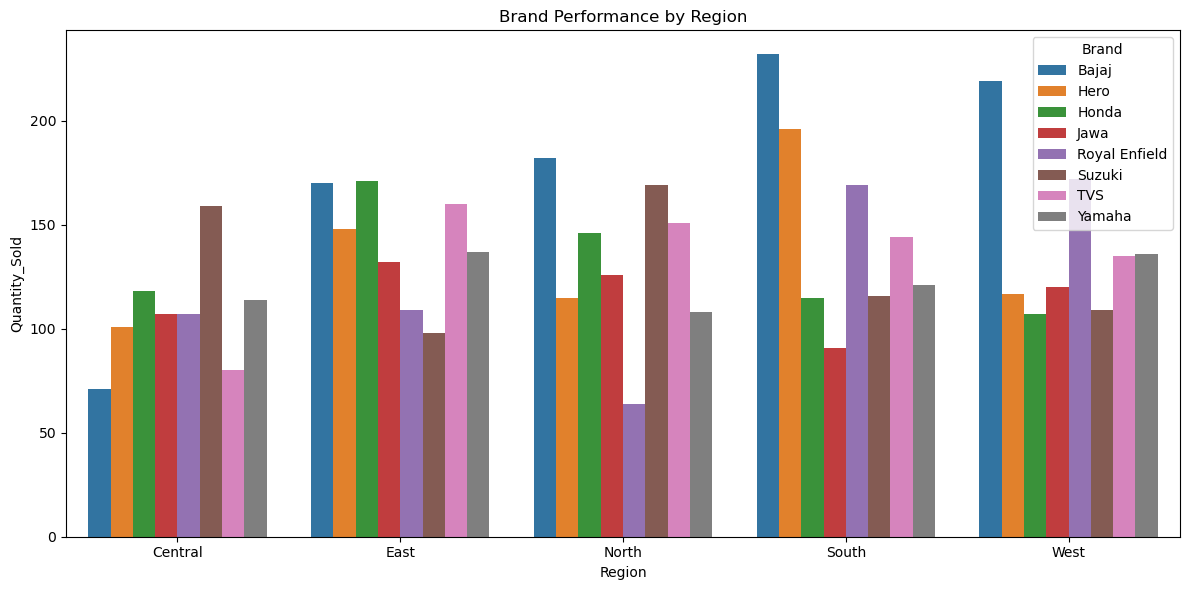

In [42]:
#11) Brand performance by region (grouped bar)
brand_region = df.groupby(['Region','Brand'])['Quantity_Sold'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=brand_region, x='Region', y='Quantity_Sold', hue='Brand')
plt.title("Brand Performance by Region")
plt.tight_layout()
plt.show()

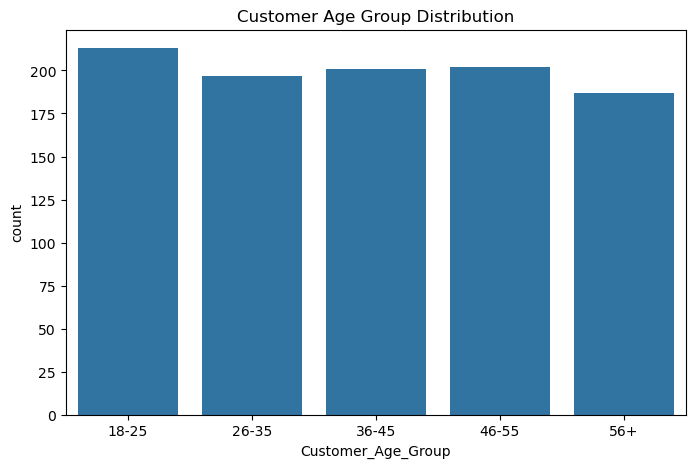

In [43]:
# 12)Sales by Age Group
plt.figure(figsize=(8,5))
sns.countplot(x='Customer_Age_Group', data=df, order=['18-25','26-35','36-45','46-55','56+'])
plt.title("Customer Age Group Distribution")
plt.show()

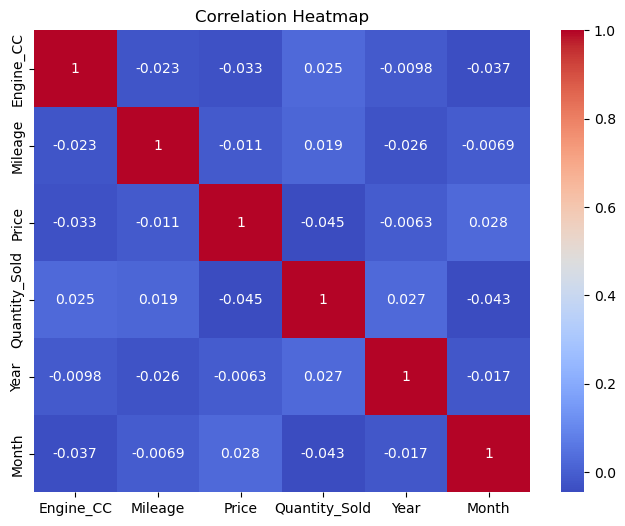

In [45]:
# 13)Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [46]:
# Compute a few quick insights programmatically
top_brand = sales_by_brand.index[0]
top_brand_sales = sales_by_brand.iloc[0]

top_region = sales_by_region.index[0]
top_region_sales = sales_by_region.iloc[0]

top_age_group = df['Customer_Age_Group'].value_counts().idxmax()

best_model = top_models.index[0]
best_model_qty = top_models.iloc[0]

print(f"Top brand by units sold: {top_brand} ({top_brand_sales} units)")
print(f"Top region by units sold: {top_region} ({top_region_sales} units)")
print(f"Top customer age group: {top_age_group}")
print(f"Top model: {best_model} ({best_model_qty} units sold)")

Top brand by units sold: Bajaj (874 units)
Top region by units sold: South (1184 units)
Top customer age group: 18-25
Top model: Avenger (291 units sold)


In [1]:
import os
print(os.getcwd())

d:\
